# Pandas Hands on

Inspired by [talumbau/strata_data](https://github.com/talumbau/strata_data) 
In this notebook we are going to learn the following:
- Pandas Data Structures: How We Work With Data
- Pandas I/O: How We Get Our Data into Pandas
- Slicing/Dicing/Mixing/Matching

Basically, this notebook is for practicing Pandas, the universal practical data analysis. It is called
**swiss knife** tool of data analysis.


### Why is Pandas fast?
- If you are familiar with *Numpy*, `Series` and `DataFrames` are built upon `numpy.ndarray`.
- pandas supports the same `ufunc` operations as in *Numpy*, and the same fast vectorized computations.


### Pandas Data Structures

#### Series

- One dimensional serial data
- It is basically a one dimensional array of **homogeneous** data.
- Series objects also include a second array called **Index**. It can contain homogeneous values of any type like integers, strings or datetime objects.

#### DataFrame

- Two dimensional collection of tabular data
- It is basically a two-dimensional table of **heterogeneous** data, composed of multiple **Series**.
- Like Series, DataFrame objects include a column index. The index objects permits for very sophisticated selection operations using square brackets ([]) along with some specialized selection functions.

#### Installation and Nitty-Gritty details
- If you are in conda environment you can use:

    `conda install pandas`
- If you are using pip

    `pip install pandas`
- For more details about installtion and documentation visit [https://pandas.pydata.org/](https://pandas.pydata.org/)


Lets get our hands dirty

In [1]:
import pandas as pd
pd.__version__

'0.24.2'

In [2]:
# to embed plots in the notebook
%matplotlib inline

#### Reading Data
Pandas has a very simple interface to read data from files or from websites. Let's read a data file which has details of google's stock from 2010 to 2014. Asn  this is a tabular data, we are reading this in Panda's dataframe. `head` just gives you first 5 rows of data frame, usually used for not inspecting if data has been loaded successfully.

In [3]:
goog = pd.read_csv('data/goog.csv', index_col='Date', parse_dates=True)
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN


#### Reading data from web

For reading data from web we are going to use an auxillary module called `pandas-datareader`. You can install this as 

`conda install pandas-datareader`

In [4]:
!conda install -y pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ramand\AppData\Local\Continuum\anaconda3\envs\tf-gpu

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-datareader-0.7.0    |           py37_0         141 KB
    ------------------------------------------------------------
                                           Total:         141 KB

The following NEW packages will be INSTALLED:

  libiconv           pkgs/main/win-64::libiconv-1.15-h1df5818_7
  libxml2            pkgs/main/win-64::libxml2-2.9.9-h464c3ec_0
  libxslt            pkgs/main/win-64::libxslt-1.1.33-h579f668_0
  lxml               pkgs/main/win-64::lxml-4.3.3-py37h1350720_0
  pandas-datareader  pkgs/main/win-64::pandas-datareader-0.7.0-py37_0




pandas-datareader-0. | 141 KB    |            |   0% 
pandas-datareader-0. | 141 K

Our google data is old, lets read new data from *IEX* using `pandas-datareader`. Refer to [documentation](https://pandas-datareader.readthedocs.io) of pandas-datareader for more details. 

In [13]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 5, 19)
df_goog = web.DataReader('GOOGL', 'iex', start, end)



In [14]:
df_goog.head()

,open,high,low,close,volume
date,,,,,
2014-05-20,540.00,546.35,536.57,540.39,2425292
2014-05-21,542.90,549.75,542.11,549.70,1564854
2014-05-22,552.20,557.96,551.00,555.45,2149757
2014-05-23,558.13,565.00,554.17,563.80,2672674
2014-05-27,567.78,574.87,564.15,574.87,2191828


Let's save this data to CSV.

In [15]:
 df_goog.to_csv('data/goog_new.csv', index=True, encoding='utf-8')

#### Data investigation

Let's investigate the data we obtained and stored in pandas

In [16]:
type(df_goog)

pandas.core.frame.DataFrame

As used before, head is used to inspect the first few lines of the dataset. By default it is 5 rows, however you can give an argument to get more rows. Let's get first 10 rows.

In [17]:
df_goog.head(10)

,open,high,low,close,volume
date,,,,,
2014-05-20,540.00,546.35,536.5700,540.39,2425292
2014-05-21,542.90,549.75,542.1100,549.70,1564854
2014-05-22,552.20,557.96,551.0000,555.45,2149757
2014-05-23,558.13,565.00,554.1700,563.80,2672674
2014-05-27,567.78,574.87,564.1500,574.87,2191828
2014-05-28,574.57,577.66,569.9520,570.45,1581576
2014-05-29,573.39,573.48,568.4525,570.56,1411296
2014-05-30,571.64,572.58,565.7900,571.65,1871737
2014-06-02,569.75,570.41,556.7000,564.34,1663640


Let's get more information about the dataframe through `info` function. `info` gives details like
- The name of each column.
- The datatype (numpy.dtype) of each column.
- The number of real values present.
- The total number of memory used.

In [18]:
df_goog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2014-05-20 to 2019-05-17
Data columns (total 5 columns):
open      1258 non-null float64
high      1258 non-null float64
low       1258 non-null float64
close     1258 non-null float64
volume    1258 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0+ KB


#### Data Indexing
Let's explore Panda's most powerful feature - indexing. It goes way beyond integer indexing.

In [24]:
df_goog['open']

date
2014-05-20     540.00
2014-05-21     542.90
2014-05-22     552.20
2014-05-23     558.13
2014-05-27     567.78
2014-05-28     574.57
2014-05-29     573.39
2014-05-30     571.64
2014-06-02     569.75
2014-06-03     560.90
2014-06-04     551.52
2014-06-05     557.11
2014-06-06     568.16
2014-06-09     566.75
2014-06-10     568.78
2014-06-11     565.92
2014-06-12     567.00
2014-06-13     560.08
2014-06-16     557.25
2014-06-17     552.36
2014-06-18     552.80
2014-06-19     561.15
2014-06-20     566.45
2014-06-23     564.35
2014-06-24     574.22
2014-06-25     573.55
2014-06-26     589.30
2014-06-27     585.45
2014-06-30     586.76
2014-07-01     587.65
               ...   
2019-04-05    1219.30
2019-04-08    1211.11
2019-04-09    1201.89
2019-04-10    1205.09
2019-04-11    1208.90
2019-04-12    1215.62
2019-04-15    1224.09
2019-04-16    1230.00
2019-04-17    1237.00
2019-04-18    1245.00
2019-04-22    1236.67
2019-04-23    1256.64
2019-04-24    1270.59
2019-04-25    1270.30
2019-

Again we can restrict our output to first few, however lets first inspect the type of this.

In [25]:
type(df_goog['open'])

pandas.core.series.Series

As expected, it is a pandas series object.

In [26]:
df_goog['open'].head(5)

date
2014-05-20    540.00
2014-05-21    542.90
2014-05-22    552.20
2014-05-23    558.13
2014-05-27    567.78
Name: open, dtype: float64

Let's use integer indexing, iloc --> i for integer

In [27]:
df_goog['open'].iloc[0:5]

date
2014-05-20    540.00
2014-05-21    542.90
2014-05-22    552.20
2014-05-23    558.13
2014-05-27    567.78
Name: open, dtype: float64

Our dataframe is indexed on 'date' column, therefore we can use loc to get rows

In [30]:
df_goog.loc['2014-05-20':'2014-06-03', 'open']

date
2014-05-20    540.00
2014-05-21    542.90
2014-05-22    552.20
2014-05-23    558.13
2014-05-27    567.78
2014-05-28    574.57
2014-05-29    573.39
2014-05-30    571.64
2014-06-02    569.75
2014-06-03    560.90
Name: open, dtype: float64

#### Data filtering
Let's play with data more, lets filter some data. Let's get the dates where Google ended up at the end of the day, i.e. closing price of the day is higher than opening.

In [33]:
df_goog_up = df_goog[df_goog['close'] > df_goog['open']]
up_days = len(df_goog_up)
total_days = len(df_goog)
print(f"In our data, google closed {up_days} up out of total {total_days}")

In our data, google closed 643 up out of total 1258


Our data from IEX seems to be clean, as we know from info on dataframe, however data we read from csv seems to have lot of *null* values for volume column. Lets filter that dataframe. 

In [38]:
total_rows = len(goog)
non_null_rows = goog[pd.isnull(goog['Volume']) == False]
total_non_null_rows = len(non_null_rows)
print(f"In data from CSV, there are {total_rows} total rows, out of which {total_non_null_rows} have volume data")

In data from CSV, there are 1257 total rows, out of which 194 have volume data


### Statistics from Data

`describe` on dataframe provides lot of statistical insights on dataframe.

In [41]:
df_goog.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,846.677585,853.869464,838.910412,846.668498,1.923740e+06
std,222.971725,225.326224,220.712263,223.187054,9.446248e+05
min,499.240000,500.280000,490.910000,497.060000,5.211410e+05
25%,657.447500,664.177500,650.822575,657.117500,1.365283e+06
50%,807.130000,811.397500,802.610150,807.850000,1.685544e+06
75%,1052.012500,1064.527500,1041.272500,1052.202500,2.169247e+06
max,1289.120000,1296.970000,1271.710000,1296.200000,1.285814e+07


In financial field, **volatility** of a stock is an important metric to evaluate a stock. Let's calculate volatility of Google's stock. In statistical terms, lets calculate the rolling standard deviation of the log, over the business days of the year.
- We will use `pandas` method `.pct_change()` to compute the *return* per day based on percentage change.
- After that, we use `numpy` to compute the log of the return.
- In the end, we used `pandas` method `.rolling_std()` to compute the volatility.

In [44]:
# We will create a new pandas column to hold the daily percent change.
df_goog['return'] = df_goog['close'].pct_change()
df_goog['return'].head()

date
2014-05-20         NaN
2014-05-21    0.017228
2014-05-22    0.010460
2014-05-23    0.015033
2014-05-27    0.019635
Name: return, dtype: float64

In [45]:
# Now, compute the log() of the return using numpy
import numpy as np
df_goog['logReturn'] = np.log(1+df_goog['return'])
df_goog['logReturn'].head()

date
2014-05-20         NaN
2014-05-21    0.017082
2014-05-22    0.010406
2014-05-23    0.014921
2014-05-27    0.019444
Name: logReturn, dtype: float64

In [58]:
# In the end we compute the rolling standard deviation, that is the stock's volatility.
window_size = 252 #total business days
df_goog['volatility'] = df_goog['logReturn'].rolling(window_size).std()
df_goog['volatility'].iloc[window_size-10:window_size+10]

date
2015-05-06         NaN
2015-05-07         NaN
2015-05-08         NaN
2015-05-11         NaN
2015-05-12         NaN
2015-05-13         NaN
2015-05-14         NaN
2015-05-15         NaN
2015-05-18         NaN
2015-05-19         NaN
2015-05-20    0.012592
2015-05-21    0.012556
2015-05-22    0.012541
2015-05-26    0.012533
2015-05-27    0.012499
2015-05-28    0.012490
2015-05-29    0.012530
2015-06-01    0.012538
2015-06-02    0.012524
2015-06-03    0.012476
Name: volatility, dtype: float64

### Data Visualization
Let's visualize some data of the google stock to better understand it.

In [59]:
df_goog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2014-05-20 to 2019-05-17
Data columns (total 8 columns):
open          1258 non-null float64
high          1258 non-null float64
low           1258 non-null float64
close         1258 non-null float64
volume        1258 non-null int64
return        1257 non-null float64
logReturn     1257 non-null float64
volatility    1006 non-null float64
dtypes: float64(7), int64(1)
memory usage: 128.5+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F850E0A5C0>,
      dtype=object)

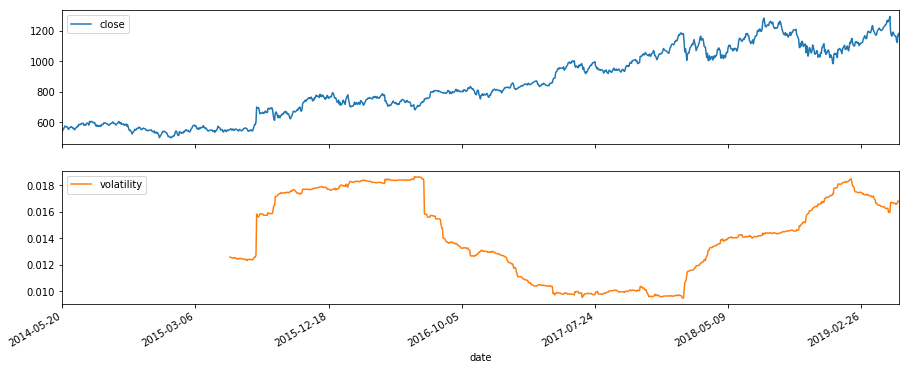

In [60]:
df_goog[['close', 'volatility']].plot(subplots=True, figsize=(15, 6))